In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from pydataset import data

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

from acquire import get_iris_data
from acquire import get_titanic_data
from acquire import get_telco_data
from prepare import split_data
import os
import acquire
from env import get_db_url

# Import and cleaning

In [2]:
telco_df = get_telco_data()
telco_df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [3]:
telco_df.contract_type.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [10]:
telco_df.payment_type.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [3]:
telco_df['billing_type'] = np.where(telco_df.payment_type.str.contains('automatic'), 'automatic', 'manual')
telco_df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [4]:
def clean_telco(df):

    df = df.drop(columns =['payment_type_id','internet_service_type_id','contract_type_id', 'customer_id', 'gender', 'senior_citizen', 'partner', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'total_charges', 'internet_service_type', 'payment_type'])

    dummy_df = pd.get_dummies(df[['dependents', 'contract_type', 'billing_type', 'churn']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [5]:
telco_df = clean_telco(telco_df)



In [6]:
telco_df.head().T

,0,1,2,3,4
dependents,Yes,No,No,No,No
monthly_charges,65.6,59.9,73.9,98.0,83.9
churn,No,No,Yes,Yes,Yes
contract_type,One year,Month-to-month,Month-to-month,Month-to-month,Month-to-month
billing_type,manual,manual,manual,manual,manual
dependents_Yes,1,0,0,0,0
contract_type_One year,1,0,0,0,0
contract_type_Two year,0,0,0,0,0
billing_type_manual,1,1,1,1,1
churn_Yes,0,0,1,1,1


# Question 1: monthly charges

Text(0.5, 1.0, 'Do Monthly Charges Affect Churn?')

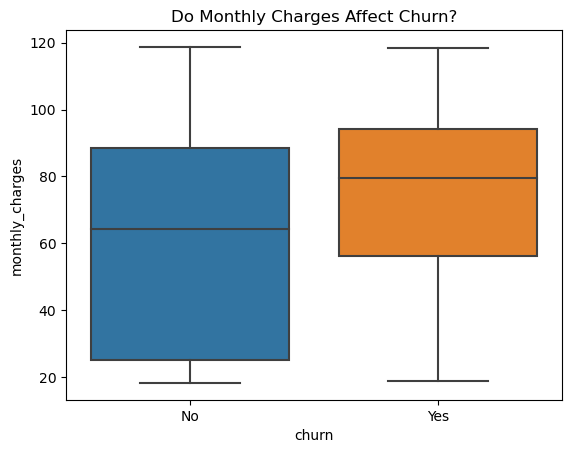

In [23]:
sns.boxplot(data=telco_df, y='monthly_charges', x='churn')
plt.title('Do Monthly Charges Affect Churn?')

Alternative Hypothesis: Customers who have churned are more likely to have higher monthly charges
Ho: There is no statistically significant difference in monthly charges between churn and no churn customers
alpha = .05

<Axes: xlabel='monthly_charges', ylabel='Count'>

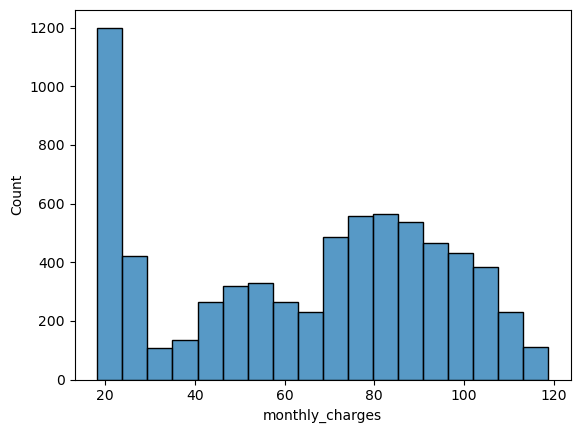

In [24]:
sns.histplot(telco_df.monthly_charges)

Cannot assume normality

In [37]:
no_churn_sample = telco_df[telco_df.churn=='No'].monthly_charges
churn_sample = telco_df[telco_df.churn=='Yes'].monthly_charges

mean_a = churn_sample.mean()
mean_b = no_churn_sample.mean()

In [39]:
stat, pval = stats.levene(churn_sample, no_churn_sample)
pval

1.0261244899421871e-78

In [47]:
# this runs a mann whitney test where the churn sample is hypothesized to be greater than the no churn sample
stat, p = stats.mannwhitneyu(churn_sample, no_churn_sample, alternative='greater')
stat, p


(6003125.5, 1.6558138259942924e-54)

We may reject the null hypothesis. Churned customer monthly charges are statistically significantly higher, on average, than no churn customers.

# Question 2: Billing Type

Does Automatic vs Manual billing type affect churn? 

Text(0.5, 1.0, 'Does Billing Type Affect Churn?')

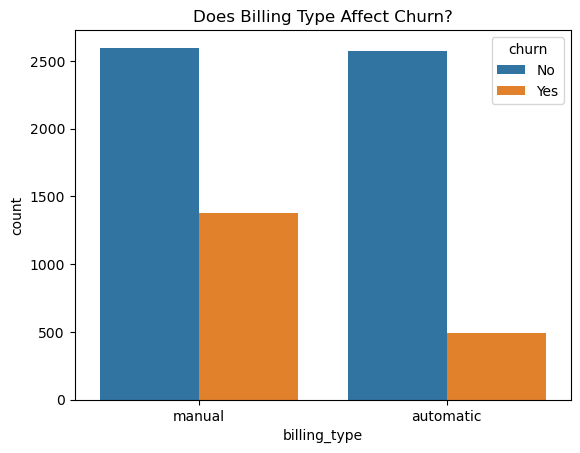

In [46]:
sns.countplot(x='billing_type', hue='churn', data=telco_df)
plt.title('Does Billing Type Affect Churn?')

Hypothesis: customers with manual billing have statistically significantly higher churn rate than those with automatic billing
Ho: There is not statistically significant different between manual and automatic billing means as regards churn status

In [48]:
observed = pd.crosstab(telco_df.churn, telco_df.billing_type)
observed

billing_type,automatic,manual
churn,,
No,2576,2598
Yes,490,1379


In [51]:


chi2, p, degf, expected = stats.chi2_contingency(observed)



3.0278725722860343e-69

In [50]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[2576 2598]
 [ 490 1379]]

Expected
[[2252 2921]
 [ 813 1055]]

----
chi^2 = 309.3486
p     = 0.0000


In [ ]:
We can reject the null hypothesis

# Question 3: Does Contract Type have a relationship with churn?

Text(0.5, 1.0, 'Does Contract Type Affect Churn?')

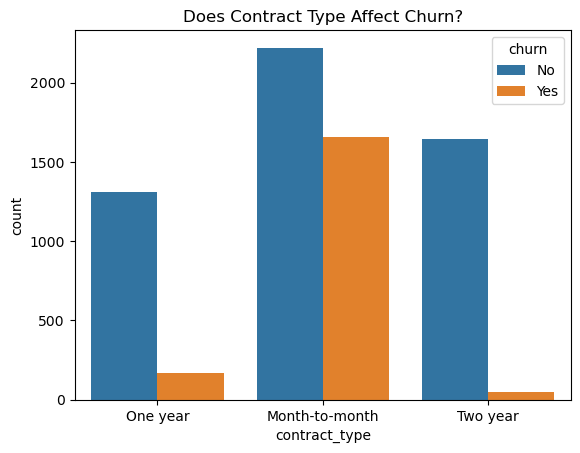

In [52]:
sns.countplot(x='contract_type', hue='churn', data=telco_df)
plt.title('Does Contract Type Affect Churn?')

Hypothesis: Contract type does have a relationship with churn
Ho: Contract type does not have a relationship with churn

In [54]:
observed_contract = pd.crosstab(telco_df.churn, telco_df.contract_type)
observed_contract

contract_type,Month-to-month,One year,Two year
churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [56]:
chi2, p, degf, expected = stats.chi2_contingency(observed_contract)
p

5.863038300673391e-258

We can reject the null hypothesis

# Question 4: Does having dependents have an effect on churn? 

Text(0.5, 1.0, 'Does Having Dependents Affect Churn?')

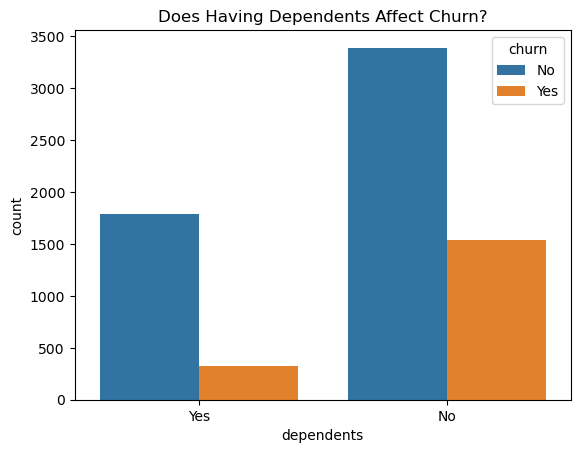

In [57]:
sns.countplot(x='dependents', hue='churn', data=telco_df)
plt.title('Does Having Dependents Affect Churn?')

Hypothesis: There is a statistically significant difference between those with dependents and those without when it comes to churn

Ho: There is no statistically significant difference between those with and without dependents when it comes to churn

In [58]:
observed_dependents = pd.crosstab(telco_df.churn, telco_df.dependents)
observed_dependents

dependents,No,Yes
churn,,
No,3390,1784
Yes,1543,326


In [59]:
chi2, p, degf, expected = stats.chi2_contingency(observed_dependents)
p

4.9249216612154196e-43

In [ ]:
We can reject the null hypothesis

# Creating a predictive model

In [7]:
train, validate, test = split_data(telco_df, col_to_stratify='churn', random_state=7)
train.shape, validate.shape, test.shape


((4225, 10), (1409, 10), (1409, 10))

In [8]:


X_train = train.drop(columns=['dependents', 'contract_type', 'billing_type', 'churn', 'churn_Yes'])
y_train = train.churn_Yes

X_validate = validate.drop(columns=['dependents', 'contract_type', 'billing_type', 'churn', 'churn_Yes'])
y_validate = validate.churn_Yes

X_test = test.drop(columns=['dependents', 'contract_type', 'billing_type', 'churn', 'churn_Yes'])
y_test = test.churn_Yes

X_train.dtypes

monthly_charges           float64
dependents_Yes              uint8
contract_type_One year      uint8
contract_type_Two year      uint8
billing_type_manual         uint8
dtype: object

In [9]:
train, validate, test = split_data(telco_df, col_to_stratify='churn')
train.shape, validate.shape, test.shape


((4225, 10), (1409, 10), (1409, 10))

In [10]:
def establish_baseline(y_train):

    baseline_prediction = y_train.mode()

    y_train_pred = pd.Series((baseline_prediction[0]), range(len(y_train)))

    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [11]:
establish_baseline(y_train)

0.7346745562130178

In [27]:


clf = DecisionTreeClassifier(max_depth=7)



In [28]:
clf = clf.fit(X_train, y_train)

In [29]:


y_pred = clf.predict(X_train)
y_pred[:10]



array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [30]:


y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]



array([[0.61672474, 0.38327526],
       [0.98214286, 0.01785714],
       [0.78971963, 0.21028037],
       [0.        , 1.        ],
       [0.78125   , 0.21875   ]])

In [31]:


cm = confusion_matrix(y_train, y_pred)
cm



array([[2752,  352],
       [ 597,  524]])

In [32]:


print(classification_report(y_train, y_pred))



              precision    recall  f1-score   support

           0       0.82      0.89      0.85      3104
           1       0.60      0.47      0.52      1121

    accuracy                           0.78      4225
   macro avg       0.71      0.68      0.69      4225
weighted avg       0.76      0.78      0.77      4225



In [33]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn)/(tn + fp + fn + tp)

true_positive_rate = tp/(tp + fn)
false_positive_rate = fp/(fp + tn)
true_negative_rate = tn/(tn + fp)
false_negative_rate = fn/(fn + tp)

precision = tp/(tp + fp)
recall = tp/(tp + fn)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = tp + fn
support_neg = fp + tn

dict = {
    'metric' : ['accuracy'
                ,'true_positive_rate'
                ,'false_positive_rate'
                ,'true_negative_rate'
                ,'false_negative_rate'
                ,'precision'
                ,'recall'
                ,'f1_score'
                ,'support_pos'
                ,'support_neg']
    ,'score' : [accuracy
                ,true_positive_rate
                ,false_positive_rate
                ,true_negative_rate
                ,false_negative_rate
                ,precision
                ,recall
                ,f1_score
                ,support_pos
                ,support_neg]
}

pd.DataFrame(dict)

,metric,score
0,accuracy,0.775385
1,true_positive_rate,0.467440
2,false_positive_rate,0.113402
3,true_negative_rate,0.886598
4,false_negative_rate,0.532560
5,precision,0.598174
6,recall,0.467440
7,f1_score,0.524787
8,support_pos,1121.000000
9,support_neg,3104.000000


In [20]:
for x in range(1,20):
#     print(x)
    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(X_train, y_train)
    acc = clf.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.73
for depth of  2, the accuracy is 0.73
for depth of  3, the accuracy is 0.75
for depth of  4, the accuracy is 0.76
for depth of  5, the accuracy is 0.77
for depth of  6, the accuracy is 0.77
for depth of  7, the accuracy is 0.78
for depth of  8, the accuracy is 0.78
for depth of  9, the accuracy is 0.79
for depth of 10, the accuracy is 0.8
for depth of 11, the accuracy is 0.81
for depth of 12, the accuracy is 0.83
for depth of 13, the accuracy is 0.84
for depth of 14, the accuracy is 0.85
for depth of 15, the accuracy is 0.87
for depth of 16, the accuracy is 0.88
for depth of 17, the accuracy is 0.89
for depth of 18, the accuracy is 0.89
for depth of 19, the accuracy is 0.9


In [21]:
scores_all = []

for x in range(1,20):

    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = clf.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])

In [22]:
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.head()


,max_depth,train_acc,val_acc
0,1,0.734675,0.734564
1,2,0.734675,0.734564
2,3,0.747219,0.774308
3,4,0.764734,0.781405
4,5,0.768757,0.775727


In [23]:
scores_df['diff'] = scores_df.train_acc - scores_df.val_acc

In [26]:
scores_df.sort_values('diff')

,max_depth,train_acc,val_acc,diff
2,3,0.747219,0.774308,-0.027089
3,4,0.764734,0.781405,-0.016672
4,5,0.768757,0.775727,-0.006970
5,6,0.772071,0.776437,-0.004366
6,7,0.775385,0.777857,-0.002472
0,1,0.734675,0.734564,0.000111
1,2,0.734675,0.734564,0.000111
7,8,0.782249,0.770759,0.011489
8,9,0.790769,0.765791,0.024978
9,10,0.801183,0.757984,0.043199


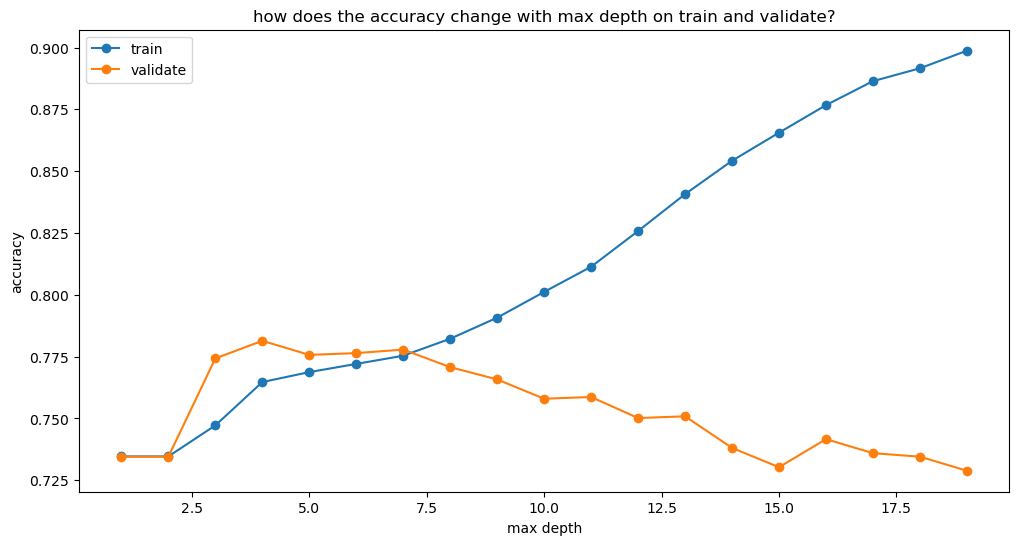

In [25]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='validate', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

Picking model 7 for match between training and validity accuracy scores

In [35]:


print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))



Accuracy of Decision Tree classifier on test set: 0.76
